# **IBMEC - Aula ao Vivo 01**

**Disciplina: Processamento de Áudio e Voz**

**prof: Sérgio Assunção Monteiro, DSc**


https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

#**Funções de Ativação**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def reLU(x): 
  n = x.size
  z= np.zeros(n)
  for i in range(n):
    if(x[i]>0):
      z[i] = x[i]   
  return z

In [ ]:
def tangenteHiperbolica(x):
  tanh = 2 / (1 + np.exp(-2*x)) -1
  return tanh

In [ ]:
def sigmoid(x): 
  z = 1/(1 + np.exp(-x)) 
  return z

In [ ]:
def softmax(x): 
  p = []
  soma = sum(np.exp(x))
  n = len(x)
  for i in range(n):
    a = np.exp(x[i])/soma
    p.append(a)
  return p

In [ ]:
a = 4
x = np.linspace(-a, a, 10000)   
#chamada para as funções
sig = sigmoid(x)
tangh = tangenteHiperbolica(x)
rLU = reLU(x)
softm = softmax(x)

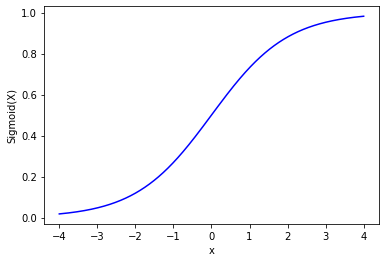

In [ ]:
#imprimir sigmóide
plt.plot(x, sig, color='blue', linestyle='solid') 

plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

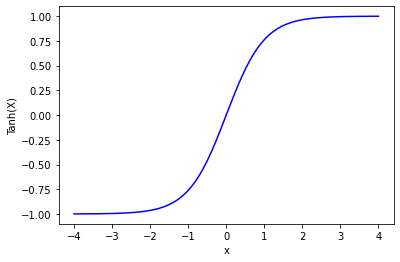

In [ ]:
#imprimir gráficos
plt.plot(x, tangh, color='blue', linestyle='solid') 
plt.xlabel("x") 
plt.ylabel("Tanh(X)") 
  
plt.show() 

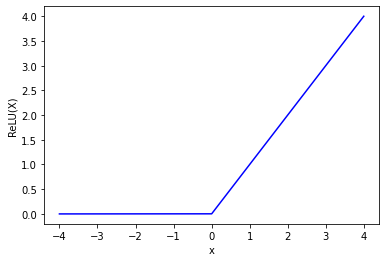

In [ ]:
#imprimir ReLU
plt.plot(x, rLU, color='blue', linestyle='solid') 

plt.xlabel("x") 
plt.ylabel("ReLU(X)") 
  
plt.show() 

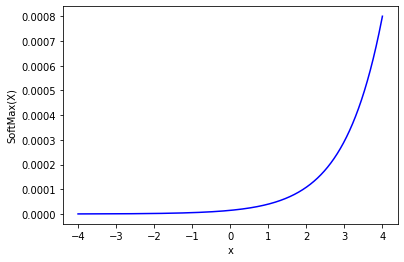

In [ ]:
#imprimir Softmax
plt.plot(x, softm, color='blue', linestyle='solid') 
#plt.plot(x, lin) 

plt.xlabel("x") 
plt.ylabel("SoftMax(X)") 
  
plt.show() 

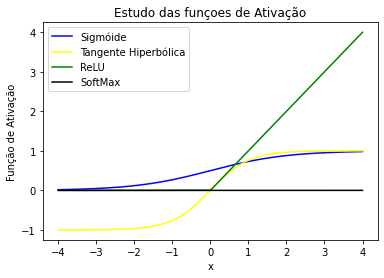

In [ ]:
#imprimir todas as funções
plt.plot(x, sig, label = "Sigmóide", color='blue', linestyle='solid')
plt.plot(x, tangh, label = "Tangente Hiperbólica", color='yellow', linestyle='solid')
plt.plot(x, rLU, label = "ReLU", color='green', linestyle='solid')
plt.plot(x, softm, label = "SoftMax", color='black', linestyle='solid')

plt.xlabel("x") 
plt.ylabel("Função de Ativação") 
plt.title('Estudo das funçoes de Ativação')
plt.legend()
  
plt.show() 

#**Redes Neurais**

**Carregar os Dados**

In [ ]:
from sklearn.datasets import load_digits
digitos = load_digits()

In [ ]:
#Existem 1797 imagens, sendo que cada uma tem uma dimensão 8 x 8 = 64)
print("Shape dos dados de imagens:{}".format(digitos.data.shape))
# Apresentar o total de dados rotulados com inteiros de 0 a 9
print("Shape dos dados rotulados: {}".format(digitos.target.shape))

Shape dos dados de imagens:(1797, 64)
Shape dos dados rotulados: (1797,)


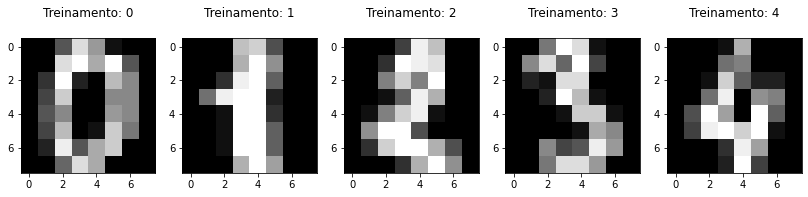

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
for index, (imagem, rotulo) in enumerate(zip(digitos.data[0:5], 
                                           digitos.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(imagem, (8,8)), 
            cmap=plt.cm.gray)
 plt.title('Treinamento: {}\n'.format(rotulo, fontsize = 15))

**Treinamento**

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(digitos.data, 
                                   digitos.target, 
                                   test_size=0.25, 
                                   random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), 
                     LogisticRegression())
pipe.fit(x_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

**Predição (Classificação)**

In [ ]:
previsto=pipe.predict(x_teste[0].reshape(1,-1))
real = y_teste[0]
print('previsto:{}; real:{}'.format(previsto[0], real))

previsto:2; real:2


In [ ]:
classificacoes = pipe.predict(x_teste[0:10])
reais = y_teste[0:10]
print('previsto:{}; real:{}'.format(classificacoes, reais))

previsto:[2 8 2 6 6 7 1 9 8 5]; real:[2 8 2 6 6 7 1 9 8 5]


In [ ]:
# Uso do método "score" para obter a acurácia do modelo
score = pipe.score(x_teste, y_teste)
print(score)

0.9666666666666667


**Matriz de Confusão**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

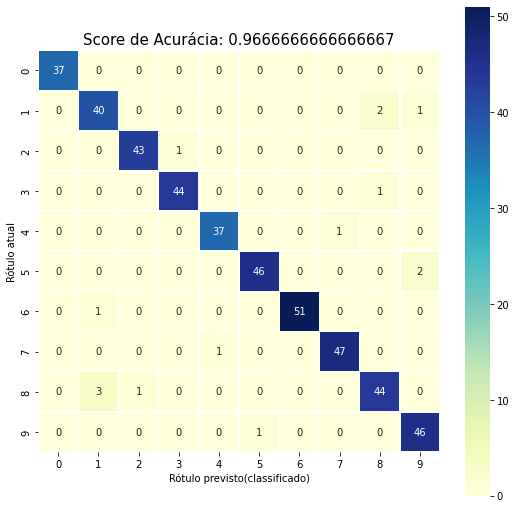

In [ ]:
y_pred = pipe.predict(x_teste)
matriz_de_confusao = metrics.confusion_matrix(y_teste, 
                              y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(matriz_de_confusao, 
            annot=True, 
            fmt=".0f", 
            linewidths=.5, 
            square = True, 
            cmap = 'YlGnBu');
plt.ylabel('Rótulo atual');
plt.xlabel('Rótulo previsto(classificado)');
titulos_todas_amostras = 'Score de Acurácia: {0}'.format(score)
plt.title(titulos_todas_amostras, size = 15);

#**Processamento de Linguagem Natural**

In [ ]:
from nltk import trigrams
from nltk.util import ngrams
from IPython.display import display, HTML
import pandas as pd
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [ ]:
texto = "É um modelo de teste para teste de sequências de teste de um modelo exemplo."
lista_termos = texto.lower().split()
qtd_palavras = collections.Counter(lista_termos)
qtd_palavras

Counter({'de': 4,
         'exemplo.': 1,
         'modelo': 2,
         'para': 1,
         'sequências': 1,
         'teste': 3,
         'um': 2,
         'é': 1})

é,um,modelo,de,teste,para,teste,de,sequências,de,teste,de,um,modelo,exemplo.


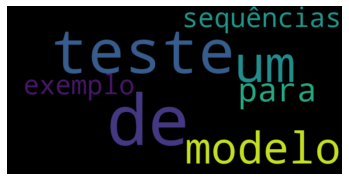

In [ ]:
palavras_lista = re.sub("\s", ",", texto.lower())
nuvem_palavras = WordCloud(background_color='black',
                           width=800,height=400).generate(palavras_lista)
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
nuvem_palavras.to_file("Nuvem de palavras.png")
print(palavras_lista)

In [ ]:
trigramas = list(trigrams(lista_termos))
qtd_trigramas = collections.Counter(trigramas)
qtd = qtd_trigramas.most_common(10)
df_trigramas = pd.DataFrame(qtd, columns = ['Trigrama','Quantidade'])
print("Resultados")
df_trigramas.head()

Resultados


,Trigrama,Quantidade
0,"(é, um, modelo)",1
1,"(um, modelo, de)",1
2,"(modelo, de, teste)",1
3,"(de, teste, para)",1
4,"(teste, para, teste)",1
